# **2.1 Image processing**

Image processing encompasses a number of techniques to improve the overall quality of an image (image smoothing, enhancement, etc.). In this notebook we focus in just a small subset of techniques, but which are very useful for subsequent tasks as keypoint detection. These are:

* Image convolution
* Average Smoothing
* Gaussian Smoothing
* Median Filter


**This notebook contains <font color=green>4 assignments</font> and <font color=blue>4 discussions</font>**

## **Problem context - License-plate recognition**

<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/access_system.png" width="400">


Recently, the University of Málaga (UMA) has installed a license plate recognition system to grant the access to authorized vehicles to its premises. And they have asked some computer vision students for help to implement this.

For that, they have provided you with a set of images that are affected by noise and you are asked to process them in order to make the recognition system more robust.

## **2.1.1 Image convolution**

Before deal with the license-plate recognition system, we will have a look to an important mathematical technique, widely used in Computer Vision.

A 2D convolution, represented by the $\oplus$ symbol, is a fundamental tool in numerous image processing techniques (e.g. image smoothing, edge detection, etc.). Concretely, this mathematical operation is useful when implementing operators whose output pixel values are linear combinations of the input ones.

There are two principal actors in a convolution: **the image** and **the kernel**. Both are 2D matrices, but usually the **kernel has a significant lower size** compared with the image. Let's define them as:

- **Image ($I$)**: The image in which some image processing technique is needed.  
<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/lena.jpeg" width="200">
</center>

- **Kernel ($K$)**: A small 2D matrix that defines the linear operation that is going to be applied over the image.

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
	</tbody>
</table> $\\[5pt]$

Once we have defined the input image and the kernel, the convolution operation for a certain pixel with coordinates $r$ and $c$ results:$\\[5pt]$

$$O(r,c) = \sum_{i=-w}^w \ \sum_{j=-w}^w \ I(r+i, c+j) * K(-i, -j)$$

where:  
- $O$ is the output image.  
- $w$ is the **kernel aperture size** (for example, the kernel shown above would have an aperture of $w=1$).

But, what does this equation actually does?  

Convolution is the process of adding each element of the input image with its local neighbors, weighted by the kernel. For example, if we have two $3\times3$ matrices, one of them a kernel, and the other a piece of the image, convolution is the process of **flipping both the rows and columns of the kernel and then multiplying locationally overlapping entries and adding them**.

Well, in this notebook, we will use the OpenCV library to perform convolution. For that, it provides the 2D-convolution [cv2.filter2D()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) method, whose main inputs are:

- **src**: source image (a numpy array)
- **ddepth**: data type of output image (`cv2.CV_8U` for 8-bits unsigned integer, `cv2.CV_16S` for 16-bits signed integer, $\ldots$). **It depends on the kernel** you use. Note that there are kernels that can return negative values in the convolution output.
- **kernel**: convolution kernel (another numpy array)
- **borderType**: padding options ([border types](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)).

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
import random

images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 2. Image processing/images/'

### **<font color=green><b>ASSIGNMENT #1: Applying convolutions</b></font>**
Check the [documentation](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) for the function and apply a convolution to the grayscale image `lena.jpeg` using a $3\times3$ kernel with a constant value of $1/9$. Finally, show the original image and the convolved one.

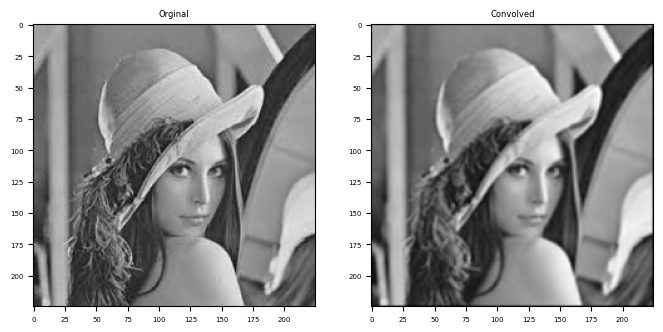

In [ ]:
# ASSIGNMENT #1
# Read the image
# Define the kernel
# Apply convolution (note that convolution cannot return negative values using this kernel)
# Show the original image and the convolved image


#Reading the image from My Drive
images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 2. Image processing/images/'image001
image = cv2.imread(images_path + 'lena.jpeg',0) # 0 read any image as gray

#Defining the kernel using a 3 x 3
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2
#kernel = np.array([
#    [1/9, 1/9, 1/9],
#    [1/9, 1/9, 1/9],
#    [1/9, 1/9, 1/9]
#])

#Using the filter2D() function to apply changes to orginal image
convolved = cv2.filter2D(src=image, ddepth=-1, kernel=kernel, borderType = 0)

#cv2.imshow('Orginal', image)
#cv2.imshow('Convolved', convolved)

#cv2.waitKey()
#cv.destroyAllWindows()

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Orginal')
#plt.axis()
plt.subplot(1,2,2)
plt.imshow(convolved, cmap='gray')
plt.title('Convolved')
matplotlib.rcParams.update({'font.size': 5})
plt.axis()
plt.show()



#### **<font color=red><b>Expected output</b></font>**
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/ch2_1_a1_result.png" width="500">




#### **<font color=blue><b>Discussion #1</b></font>**

**Answer the following questions** about convolution:

- What is the difference between the original image and the convolved one?
    
    <font color=blue><b>The key distinction is that the convolved image is generated by using a mask that smoothens the image by averaging each pixel's value with its surrounding pixels. This process involves convolving the image with a kernel that has a value of 1/9 at each position.</b></font>

- At this point, can you guess which image processing technique is this kernel implementing?
    
    <font color=blue><b>Technique is called box blur, it is a smoothing technique</b></font>

Additionally, you can use [this demo](https://setosa.io/ev/image-kernels/) to understand the convolution operator for image processing in a visual way. Anyway, **don't worry if you don't fully understand it**, convolution is a complex operation that have multiple applications and will be understood progressively while doing practical exercises.

## **2.1.2 Average Smoothing**

**Smoothing** intends to reduce the noise that may be present in the images. There are some interesting smoothing techniques based on the convolution mathematical operation that can help you to alleviate the noise problem. Two examples are **Average Smoothing** and **Gaussian filter**.

Convolving an image with a *small* kernel is similar to apply a function over all the image. For example, by using convolution it is possible to apply the first smoothing operator that you are going to try: **Average Smoothing**. This operator averages the intensity values of pixels surrounding a given one, efficiently removing noise. Formally:

<center>
$S(i,j) = \frac{1}{p} \sum_{(m,n)\in s} I(m,n)$
</center>

with $s$ being the set of $p$ pixels in the neighborhood ($m \times n$) of $(i,j)$. Convolution permits us to implement it using a kernel, resulting in a linear operation! For example, for a $3\times3$ neighborhood:

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
	</tbody>
</table>

You can think that the kernel is like a weight matrix for neighbor pixels, and convolution like a double `for` loop that applies the kernel pixel by pixel over the image.

**Sounds familiar? That's right, this is exactly what you did in the previous exercise.**

### **<font color=green>ASSIGNMENT #2: Applying average smoothing</font>**
Create a function called **average_filter** that convolves an input image using a kernel which values depend on its size (e.g. for a size $3\times3$ size its values are $\frac{1}{9}$, for a $5\times5$ size $\frac{1}{25}$ and so on). Then display the differences between the original image and the resultant one if `verbose` is True. It takes the image and kernel aperture size as input and returns the smoothed image.

> <font color=orange>Remember: OpenCV defines the 2D-convolution [cv2.filter2D()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) method, where:
- *the `ddepth` parameter means desired depth of the destination image.*
- *Input images use to be 8-bit unsigned integer (`ddepth`=cv2.CV_8U).*
- *However, output sometimes is required to be 16-bit signed (`ddepth`=cv2.CV_16S)*</font>

In [ ]:
# ASSIGNMENT #2
# Implement a function that applies an 'average filter' to an input image.
# Show the input image and the resulting one in a 1x2 plot (if verbose = True)
from PIL import Image
def average_filter(image, w_kernel, verbose=False):

    """ Applies neighborhood averaging to an image and display it.

        Args:
            image       : [numpy array] grayscale image
            w_kernel    : [integer] kernel aperture size (width = 2*w_kernel+1)
            verbose     : [bool] flag for displaying or not the images

        Returns:
            smoothed_img: [numpy array] smoothed image
    """

    # Write your code here!
    # ...
    #read the orginal image
    #img = Image.fromarray(image, 'L')
    #img.save("imge.png")
    #kernel = np.ones((w_kernel, w_kernel), dtype=np.float32) / w_kernel**2
    #smoothed_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    k =  2*w_kernel+1
    kernel = 1/(k*k)*np.ones((k,k))
    smoothed_img = cv2.filter2D(src=image, ddepth=cv2.CV_8U, kernel=kernel)

    if verbose == True:
      plt.subplot(1,2,1)
      plt.imshow(image, cmap='gray')
      plt.title('Orginal')

      plt.subplot(1,2,2)
      plt.imshow(smoothed_img, cmap='gray')
      plt.title('Average filter')

    return smoothed_img

    return smoothed_img


You can use the next snippet of code to **test if your results are correct**:


In [ ]:
# Try this code
image = np.array([[1,6,2,5],[22,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8) # dummy input 2D array
w_kernel = 3
print(average_filter(image, w_kernel))

[[ 7  9  8  8]
 [ 8  9  8  9]
 [ 9 10  9 10]
 [ 7  8  8  8]]


#### **<font color=red><b>Expected output</b></font>**

    [[ 9 12  9 12]  
    [  8 10  8 10]  
    [  7 10  8 11]  
    [  5  7  6  8]]

#### **<font color=blue>Discussion #2</font>**

Now, apply your **average_filter** to the noisy images `noisy_1.jpg` and `noisy_2.jpg` using this snippet of code.

> <font color=orange>Note how we can use `interactive` to create a slider control to easily change the values of a certain input to the function (`w_kernel`, in this case).</font>

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), Output()), _dom_classes=('widget-inte…

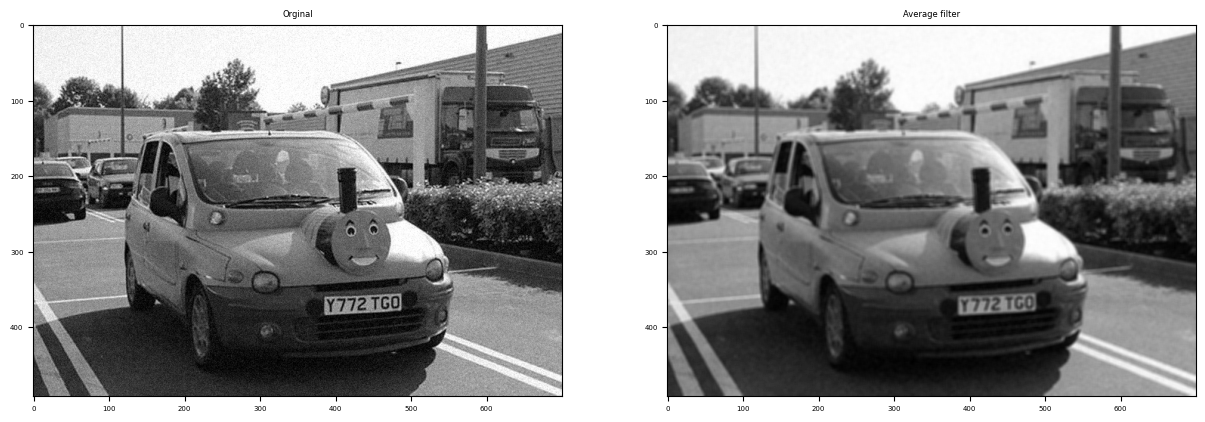

In [ ]:
# Interact with the kernel size
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', cv2.IMREAD_GRAYSCALE)
interactive(average_filter, image=fixed(noisy_img), w_kernel=(0,5,1), verbose=fixed(True))

#plt.figure()
#plt.subplot(1,2,1)
#plt.imshow(noisy_img, cmap='gray')
#plt.title('Orginal')
#plt.axis()
#plt.subplot(1,2,2)
#plt.imshow(average_filter, cmap='gray')
#plt.title('Average filter')
#plt.axis()
#plt.show()

#### **<font color=red><b>Expected output</b></font>**
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/ch2_1_a2_result.png" width="600">

Then, **answer these questions**:

- Is noise removed in the first image?

    <font color=blue><b>Yes, because we are using averaging</b></font>

- Is noise removed in the second image?

    <font color=blue><b>No, the presence of salt and pepper noise is effectively eliminated  through the application of a median </b></font>

- Try some different values for `w_kernel` and decide which one is the best in your opinion.

    <font color=blue><b>The optimal choice for the kernel size is 4x4</b></font>

- What do you think it is the main drawback of this technique?

    <font color=blue><b>Even though the noise in the original image is eliminated, the ultimate visual integrity of the image is compromised. It is crucial to acknowledge the balance between reducing noise and preserving the overall quality of the image.</b></font>

## **2.1.3 Gaussian Smoothing**

An alternative to neighborhood averaging is **Gaussian smoothing**. This technique applies the same concept than averaging (a convolution operation) but with a more complex kernel.

The idea is to take advantage of the normal distribution for creating a kernel that keeps borders while smoothing. This is done by giving more relevance to the pixels that are closer to the kernel center, creating a **neighborhood weighted averaging**.

Remember that in 1-D, the Gaussian kernel has this expression:
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)$$

In 2-D, we can make use of the *separability property* to separate rows and columns, resulting in convolutions of two 1D kernels:
$$g_{\sigma}(x,y) = \underbrace{\frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)}_{g}
= \underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)}_{g_x}*
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{y^2}{2\sigma^2}\right)}_{g_y}
$$

For example:

<div style="margin: 0 auto; text-align: center; display: table;">

<table style = "display: table-cell; vertical-align: middle;">
<tr>
	<td bgcolor="white" >$g=g_y\otimes g_x\rightarrow$</td>
	<td bgcolor="white">
		<table style = "display: table-cell; vertical-align: middle; ">
			<tbody>
				<tr>
					<td style="border: 1px solid;">1</td>
					<td style="border: 1px solid;">2</td>
					<td style="border: 1px solid;">1</td>
				</tr>
				<tr>
					<td style="border: 1px solid;">2</td>
					<td style="border: 1px solid;" bgcolor="#81F7F3">4</td>
					<td style="border: 1px solid;">2</td>
				</tr>
				<tr>
					<td style="border: 1px solid;">1</td>
					<td style="border: 1px solid;">2</td>
					<td style="border: 1px solid;">1</td>
				</tr>
			</tbody>
		</table>
	</td>
	<td bgcolor="white" >$=$</td>
	<td bgcolor="white" >
		<table style = "display: table-cell; vertical-align: middle;">
			<tbody>
				<tr>
					<td style="border: 1px solid;">1</td>
				</tr>
				<tr>
					<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
				</tr>
				<tr>
					<td style="border: 1px solid;">1</td>
				</tr>
			</tbody>
		</table>
</td>
<td bgcolor="white" >$\otimes$</td>
<td bgcolor="white" >
	<table style = "display: table-cell; vertical-align: middle;">
		<tbody>
			<tr>
				<td style="border: 1px solid;">1</td>
				<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
				<td style="border: 1px solid;">1</td>
			</tr>
		</tbody>
	</table>
</td>
</tr>
</table>
</div>

In the implementation, this equals to perform the outer product between two 1-D kernels. Check the documentation for such [function](https://numpy.org/doc/stable/reference/generated/numpy.outer.html).

### **<font color=green>ASSIGNMENT #3: Implementing the Gaussian filter</font>**

Complete the `gaussian_filter()` fucntion in a similar way to the previous one, but including a new input: `sigma`, representing the standard deviation of the Gaussian distribution used for building the kernel.

> <font color=orange>Tip: NumPy defines mathematical functions that operate over arrays like [exponential](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) or [square-root](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), as well as mathematical [constants](https://docs.scipy.org/doc/numpy/reference/constants.html) like `np.pi`. Remember the associative property of convolution.</font>

In [ ]:
# ASSIGNMENT 3
# Implement a function that:
# - creates a 2D Gaussian filter (tip: it can be done by implementing a 1D Gaussian filter and doing the outer product of the 1D kernel with itself)
# - convolves the input image with the kernel
# - displays the input image and the filtered one in a 1x2 plot (if verbose=True)
# - returns the smoothed image
def gaussian_filter(image, w_kernel, sigma, verbose=False):
    """ Applies Gaussian filter to an image and display it.

        Args:
            image       : [numpy array] grayscale image
            w_kernel    : [integer] kernel aperture size (width = 2*w_kernel+1)
            sigma       : [num] standard deviation of Gaussian distribution
            verbose     : [bool] flag for displaying or not the images

        Returns:
            smoothed_img: [numpy array] smoothed image
    """
    # Write your code here!
    # ...
    kernel_1d = [np.exp(-z*z/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma) for z in range (-w_kernel, w_kernel+1)]
    kernel_2d = np.outer(kernel_1d,kernel_1d)
    smoothed_img = cv2.filter2D(image,cv2.CV_8U,kernel_2d)

    if verbose ==True:

      plt.figure(1)
      plt.subplot(1,2,1)
      plt.imshow(image, cmap='gray')
      plt.title('Original')
      plt.subplot(1,2,2)
      plt.imshow(smoothed_img, cmap='gray')
      plt.title('Average filter')
      plt.show()

    return smoothed_img

Again, you can use this code to **test if your results are correct**:

In [ ]:
image = np.array([[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)  # dummy input 2D array
w_kernel = 1
sigma = 1
print(gaussian_filter(image, w_kernel,sigma))

[[5 6 7 8]
 [5 7 7 8]
 [4 6 7 7]
 [3 5 5 5]]


#### **<font color=red><b>Expected output</b></font>**

    [[5 6 7 8]
     [5 7 7 8]
     [4 6 7 7]
     [3 5 5 5]]

#### **<font color=blue>Discussion #3</font>**
Apply your **gaussian_filter** to the noisy images `noisy_1.jpg` and `noisy_2.jpg` using this snippet of code.

In [ ]:
# Interact with the kernel size and the sigma value
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', cv2.IMREAD_GRAYSCALE)
interactive(gaussian_filter, image=fixed(noisy_img), w_kernel=(0,5,1), sigma=(1,3,0.3), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

#### **<font color=red><b>Expected output</b></font>**
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/ch2_1_a3_result.png" width="600">

Then, **answer the following questions**:

- Is noise removed in the first image?

  <font color=blue><b>Yes, Gaussian noise is effectively eliminated when employing this particular filter.</b></font>

- Is noise removed in the second image?

  <font color=blue><b>No, the presence of salt and pepper noise is effectively eliminated through the application of a median</b></font>

- How can you control the level of blurring of the image?

  <font color=blue><b>By means of the kernel, as it defines the mask utilized, thus determining the resulting level of clarity and detail</b></font>

- Are the kernel aperture size and the $\sigma$ parameter of the Gaussian distribution related in some way?

  <font color=blue><b>The size of the kernel aperture and the sigma parameter of the Gaussian distribution are interconnected in how they influence the characteristics of the Gaussian filter employed in image processing. The sigma parameter controls the breadth of the Gaussian curve, while the kernel aperture size determines the dimensions of the filter window utilized for applying the Gaussian filter to an image.</b></font>

- What is a good value for `` and ``, in your opinion?

  <font color=blue><b>w_kernel=2, sigma=1,3</b></font>

## **2.2.4 Median filter**

There are other smoothing techniques besides convolution. One of them is **median filtering**, which operates by replacing each pixel in the image with the median of its neighborhood. For example, considering a $3\times3$ neighborhood:

<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/median.png" width="600">

Median filtering is quite good preserving borders (no image blurring), and is very effective to remove [salt&pepper noise](https://en.wikipedia.org/wiki/Salt-and-pepper_noise#:~:text=Salt%2Dand%2Dpepper%20noise%20is,occurring%20white%20and%20black%20pixels.).

### **<font color=green>ASSIGNMENT #4: Using the median filter</font>**

We want to try this filter to see if it could be useful for our system. For that, complete the `median_filter()` method in a similar way to the previous techniques. This method takes as inputs the initial image and the window aperture size (`w_window`), that is, the size of the neighborhood.

> <font color=orange>There is a function in OpenCV that already implements this filter. Try to find it!</font>


In [ ]:
# ASSIGNMENT #4
# Implement a function that:
# - applies the median filter to the input image
# - displays the input image and the filtered one in a 1x2 plot if verbose = True
# - returns the smoothed image
def median_filter(image, w_window, verbose=False):
    """ Applies median filter to an image and display it.

        Args:
            image       : [numpy array] grayscale image
            w_window    : [integer] window aperture size (width = 2*w_window+1)
            verbose     : [bool] flag for displaying or not the images

        Returns:
            smoothed_img: [numpy array] smoothed image
    """
    # Write your code here!
    # ...
    smoothed_img=image
    smoothed_img=cv2.medianBlur(image,w_window*2+1)
    if verbose == True:
      plt.figure(1)
      plt.subplot(1,2,1)
      plt.imshow(image, cmap='gray')
      plt.title('Original')
      plt.subplot(1,2,2)
      plt.imshow(smoothed_img, cmap='gray')
      plt.title('Average filter')
      plt.show()
    return smoothed_img

You can use the next code to **test if your results are correct**:

In [ ]:
image = np.array([[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8) # dummy input 2D array
w_window = 2
print(median_filter(image, w_window))

[[6 5 5 5]
 [6 5 5 5]
 [6 5 5 5]
 [6 4 4 4]]


#### **<font color=red><b>Expected output</b></font>**

    [[6 5 5 5]
     [6 5 5 5]
     [6 5 5 5]
     [6 4 4 4]]

#### **<font color=blue>Discussion #4</font>**
Just like in the previous exercises, apply your **median_filter** to the noisy images `noisy_1.jpg` and `noisy_2.jpg` using this snippet of code.

In [ ]:
# Interact with the window size
noisy_img = cv2.imread(images_path + 'noisy_2.jpg', 0)
interactive(median_filter, image=fixed(noisy_img), w_window=(1,5,1), verbose=fixed(True))

interactive(children=(IntSlider(value=3, description='w_window', max=5, min=1), Output()), _dom_classes=('widg…

#### **<font color=red><b>Expected output</b></font>**
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch2/insert/ch2_1_a4_result.png" width="600">

Now, **answer following questions**:

- Is noise removed in the first image?

  <font color=blue><b>No, the median filter does not completely eliminate Gaussian noise. While it does enhance the image, it falls short of entirely removing Gaussian noise.</b></font>

- Is noise removed in the second image?

  <font color=blue><b>Correct, median is used to remove this type of noise.</b></font>

- What is a good value for ``?

  <font color=blue><b>w_kernel=1</b></font>

- Do you think that this technique is faster or slower than the convolution-based ones?

  <font color=blue><b>The median filter technique is slower compared to convolution-based techniques. This is because it requires sorting the values within a window around each pixel, which can be computationally intensive. In contrast, convolution can be efficiently implemented using matrix operations, resulting in faster processing times.</b></font>

## **Conclusion**

That was a complete and awesome job! Congratulations, you have learned

- how to reduce noise in images, for both salt & pepper and Gaussian noise.
- which methods are useful for each type of noise and which not.
- apply convolution and efficient implementations of some kernels.

If you want to improve your knowledge about noise in digital images, you can surf the internet for *speckle noise* and *Poisson noise*.